In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler

# Load the first database Amazon

In [2]:
df = pd.read_csv('Datasets/amazon/amazon_review_ID.shuf.lrn.csv')
df.head()

X_test = pd.read_csv('Datasets/amazon/amazon_review_ID.shuf.tes.csv').drop('ID', axis=1)
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V9991,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000
0,15,10,6,7,9,3,3,3,1,1,...,0,0,1,1,0,0,0,0,0,0
1,8,10,7,2,5,7,2,5,3,3,...,0,4,0,0,0,0,0,2,1,0
2,18,9,7,8,8,7,12,6,7,1,...,0,0,1,0,0,0,1,0,0,1
3,6,5,4,2,4,1,1,1,0,3,...,0,2,0,0,0,0,0,1,0,0
4,9,3,2,5,9,3,0,3,2,4,...,0,0,0,0,0,0,0,1,0,0


In [3]:
X_lrn = df.loc[:,'V1':'V10000']
Y_lrn = df.loc[:,'Class':'Class']

# Change the attributes from the Class coloum into numbers 

In [4]:
Class_description = []
Class_description = pd.unique(df.Class)

for i in range(len(Class_description)):
    df.Class[df.Class == Class_description[i]] = i+1

In [5]:
X_lrn = df.loc[:,'V1':'V10000']
Y_lrn = df.loc[:,'Class':'Class'].astype(float)
Y_lrn

,Class
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0
...,...
745,22.0
746,34.0
747,45.0
748,13.0


In [6]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_lrn, Y_lrn, test_size=0.4)

from sklearn.preprocessing import StandardScaler  # doctest: +SKIP
scaler = StandardScaler()  # doctest: +SKIP
# Don't cheat - fit only on training data
scaler.fit(X_train)  # doctest: +SKIP
X_train = scaler.transform(X_train)  # doctest: +SKIP
# apply same transformation to test data
X_valid = scaler.transform(X_valid)  # doctest: +SKIP

# Sets the parameter alpha for the CLassifierer

In [10]:
def MLP_Search(alphas,modes,solv):
    erg = []
    for i in alphas:
        for j in modes:
            for k in solv:
                clf = MLPClassifier(max_iter=500,activation=j)
                #clf = MLPClassifier(hidden_layer_sizes=(500,500,500), max_iter=300, alpha=i,solver='sgd', verbose=10,  random_state=21,tol=0.000000001,activation=j)
                clf.fit(X_train, y_train)
                Y_pred = clf.predict(X_test)
                print("alpha: ",i,"mode: ",j,"solver: ",k,"score: ",accuracy_score(y_test, Y_pred))
                erg.append("alpha:")
                erg.append(i)
                erg.append("mode:")
                erg.append(j)
                erg.append("solver:")
                erg.append(k)
                erg.append("score:")
                erg.append(accuracy_score(y_test, Y_pred))
        print("")
    return erg

In [11]:
alphas = [1e-5,1e-4,1e-3,1e-2,1e-1,0,1,10,100]
modes = ["logistic"]
solv = ["adam"]
#MLP_Search(alphas,modes,solv)

In [7]:
#Hidden Layers=300 alpha=1 mode=relu solver=adam score=0.61 
clf = MLPClassifier(hidden_layer_sizes=(300), max_iter=500, alpha=1,solver='adam',activation='relu')
#clf = MLPClassifier(hidden_layer_sizes=(1000,1000,1000), max_iter=500, alpha=0.0001,solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_valid)
print(accuracy_score(Y_valid, Y_pred))

0.6366666666666667


In [12]:
cm = confusion_matrix(Y_valid, Y_pred)
cm

array([[6, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 4, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 8, 0, 0],
       [2, 0, 0, ..., 0, 4, 0],
       [0, 0, 0, ..., 2, 0, 1]])

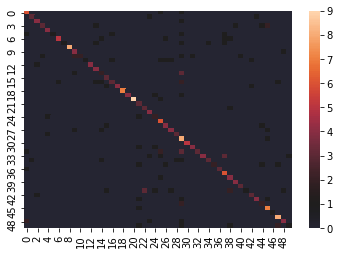

In [13]:
sns.heatmap(cm, center=True)
plt.show()